In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

In [6]:
orig_df=pd.read_csv('macrodata.csv')

In [7]:
orig_df.head()

,Unnamed: 0,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,3/31/1959,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,6/30/1959,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,9/30/1959,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,12/31/1959,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,3/31/1960,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


<font color='purple'>Output contain index column.date column does not have name(Unanamed:0). so our aim is to remove index column (index_col=0), convert the date column into date format(parse_dates = True) as index column. This will achieve with below line of code</font>


In [8]:
df = pd.read_csv('macrodata.csv',index_col=0,parse_dates=True)

In [9]:
df.head() #It will show top 5 rows

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


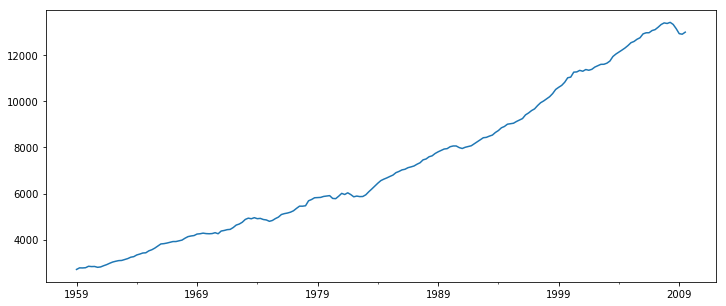

In [11]:
df['realgdp'].plot(figsize=(12,5)) #This will show real gdp value graph across the year

In [12]:
from statsmodels.tsa.filters.hp_filter import hpfilter # Hodrick-Prescott filter

<font color ='Purple'>Hodrick-Prescott filter seperate time series into cyclical & trend component. the default lambda value of 1600 is recommended. Use 6.25 for annual data, and 129,600 for monthly data</font>

In [13]:
gdp_cycle,gdp_trend=hpfilter(df['realgdp'],lamb=1600)

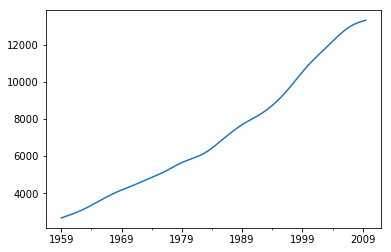

In [15]:
gdp_trend.plot()

In [19]:
df['trend']=gdp_trend #Add gdp_trend column with name trend

In [20]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333


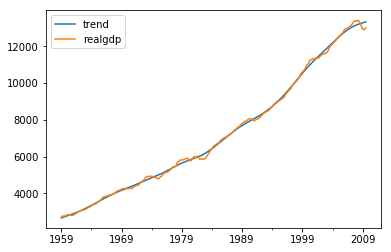

In [21]:
df[['trend','realgdp']].plot() #it will plot the graph for trend & realgdp

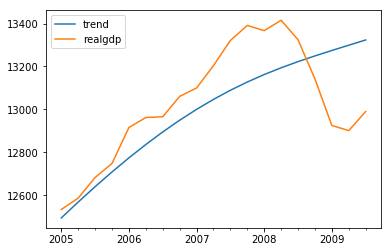

In [24]:
#lets zoom the graph for the last 5 year. we understood from the graph realgdp start decreasing after 2008

df[['trend','realgdp']]['2005-01-01':].plot()